In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
from sklearn.metrics import mean_squared_error
import numpy as np

In [6]:
df = pd.read_excel(
    "DOC-20230209-WA0007..xlsx", 
    sheet_name='CBN Electricity data', 
    header=1, 
    usecols=["YEAR", "TOTAL"]
)
df = df.drop(13, axis=0)
df.YEAR = df.YEAR.astype(int)
df.set_index('YEAR', inplace=True)

In [7]:
df.head(13)

,TOTAL
YEAR,
2000,8688.90
2001,9034.40
2002,12842.40
2003,12866.60
2004,13160.60
2005,13226.60
2006,13125.80
2007,13305.80
2008,13264.58


Text(0.5, 1.0, 'Electricity Usage from 2000 to 2012')

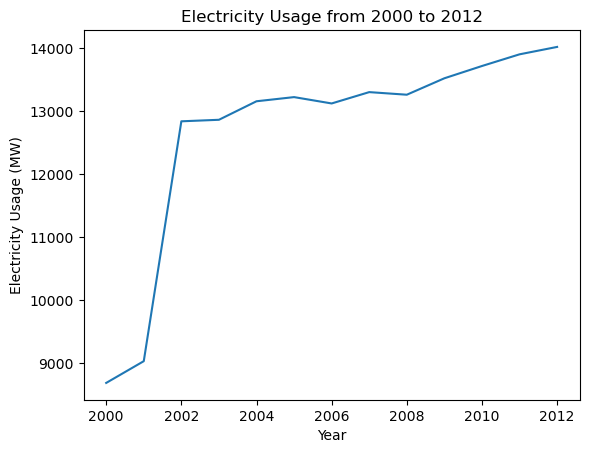

In [8]:

plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Electricity Usage (MW)')
plt.title('Electricity Usage from 2000 to 2012')


In [16]:

# Split the data into training and testing sets

train_size = df.shape[0]-4
train = df[:train_size]
test = df[train_size:]

print(train.shape, test.shape)


# Fit the ARIMA model to the training data
model = smapi.tsa.arima.ARIMA(train, order=(0,0,11))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=test.shape[0])

# Calculate the mean squared error between the predicted values and the actual values
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


(9, 1) (4, 1)


C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\st

Test MSE: 6454899.228


C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


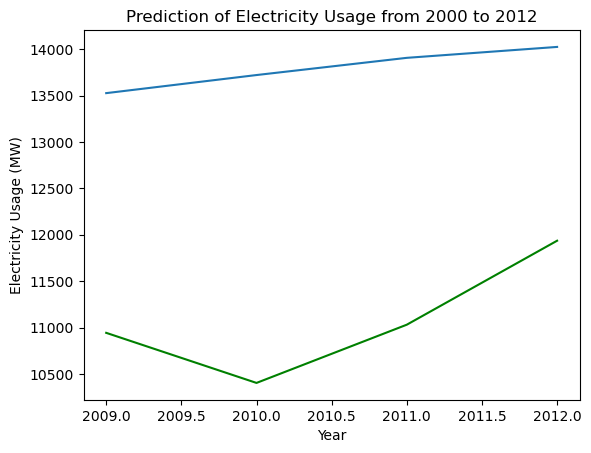

In [14]:
# Plot the predictions
plt.plot(test)
plt.plot(test.index, predictions, color='green')
plt.xlabel('Year')
plt.ylabel('Electricity Usage (MW)')
plt.title('Prediction of Electricity Usage from 2000 to 2012')
plt.show()

C:\Users\ADEBUA KEHINDE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


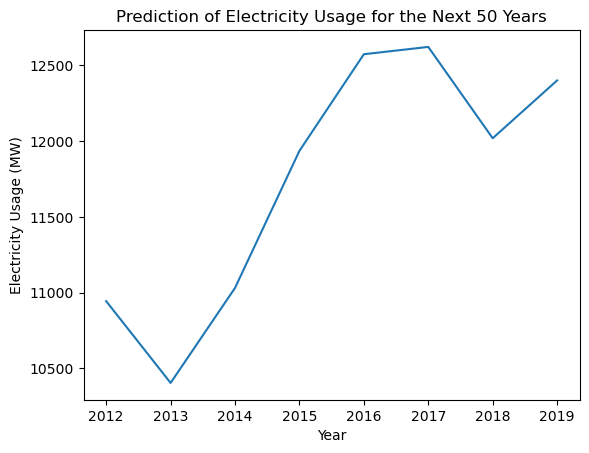

In [15]:
# Use the model to make predictions for the next 50 years
future_predictions = model_fit.forecast(steps=8)

# Plot the future predictions
years = np.arange(2012, 2020)
plt.plot(years, future_predictions)
plt.xlabel('Year')
plt.ylabel('Electricity Usage (MW)')
plt.title('Prediction of Electricity Usage for the Next 50 Years')
plt.show()